# IRIS-Project

## `01` Import Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

## `02` Data Loading

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## `03` EDA

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.describe(include=['O'])

,species
count,150
unique,3
top,Iris-setosa
freq,50


In [9]:
value_count = df['species'].value_counts()
value_count

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

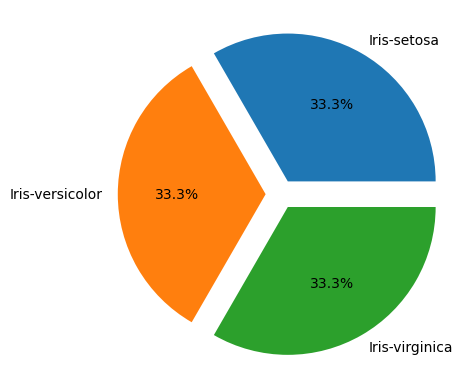

In [13]:
plt.pie(x = value_count, labels = value_count.index,autopct = '%1.1f%%', explode = (0.1, 0.1, 0.1))
plt.show();

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

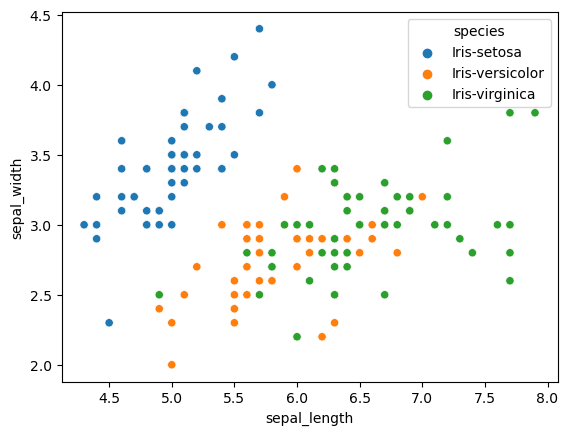

In [14]:
sns.scatterplot(data = df, x = 'sepal_length', y = 'sepal_width', hue = 'species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

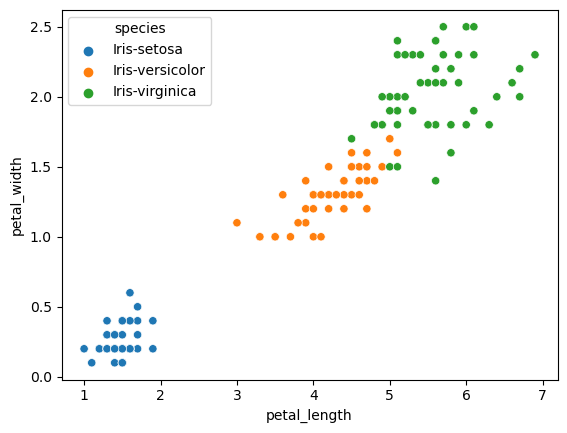

In [15]:
sns.scatterplot(data = df, x = 'petal_length', y = 'petal_width', hue = 'species')

## `04` Data PreProcessing

In [20]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [21]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [29]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

## `05` Model Training And Model Selection

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

### `01` Logistic Regression 

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [43]:
accuracy_score(y_test, lr.predict(X_test))


1.0

<Axes: >

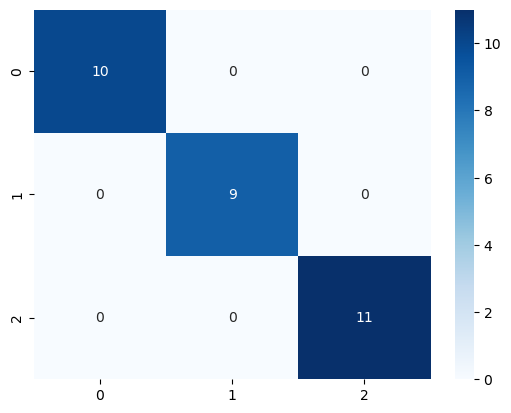

In [48]:
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test)), annot=True, cmap='Blues', )

In [67]:
pred = lr.predict([[7.3, 2.9, 6.3, 1.8]])
le.inverse_transform(pred)

array(['Iris-virginica'], dtype=object)

### `02` SVC

In [54]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = GridSearchCV(SVC(), param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.0001]})
svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.0001]})

In [55]:
svc.best_estimator_

SVC(C=1, gamma=1)

<Axes: >

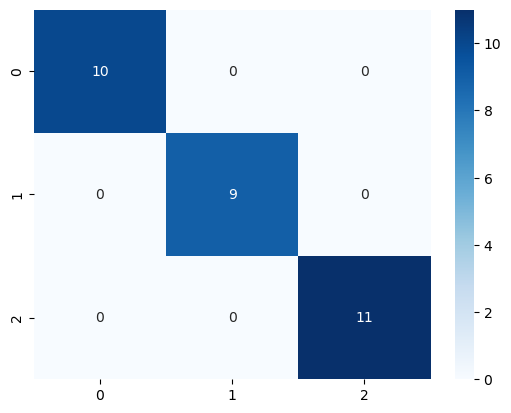

In [56]:
sns.heatmap(confusion_matrix(y_test, svc.predict(X_test)), annot = True, cmap = 'Blues')

In [66]:
pred = svc.predict([[7.3, 2.9, 6.3, 1.8]])
le.inverse_transform(pred)

array(['Iris-virginica'], dtype=object)

### `03` KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
Knn = GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors': [1, 3, 5, 7, 9]})
Knn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [59]:
Knn.best_estimator_

KNeighborsClassifier(n_neighbors=3)

<Axes: >

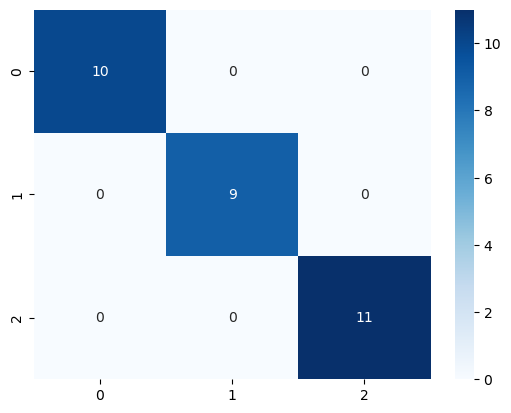

In [60]:
sns.heatmap(confusion_matrix(y_test, Knn.predict(X_test)), annot = True, cmap = 'Blues')

In [65]:
pred = Knn.predict([[7.3, 2.9, 6.3, 1.8]])
le.inverse_transform(pred)

array(['Iris-virginica'], dtype=object)

## `06` Save Model

In [68]:
import pickle
file = open('IRIS_Model.pkl', 'wb')
pickle.dump(svc , file)
file.close()

## `07` Load Model

In [69]:
import pickle
file = open('IRIS_Model.pkl', 'rb')
model = pickle.load(file)

In [72]:
le.inverse_transform(model.predict([[5.1, 3.5, 1.4, 0.2]]))

array(['Iris-setosa'], dtype=object)